Clone kaldo repo for amorphous Si tutorial structure and force constant data \
This notebook should run with just base kaldo installed.

In [1]:
# %%capture
# # Activate large file transfer in github
# ! git lfs install --skip-repo --skip-smudge

# # Git clone kALDo
# ! git clone https://github.com/nanotheorygroup/kaldo.git

# # Copy si-amorphous structure and force constant files
# ! cp -r /content/kaldo/kaldo/tests/si-amorphous ./
# ! rm -rf kaldo sample_data
import os
print(os.getcwd())

C:\Users\allen\Code (Local)\PHYS449 Local\kaldo amorphous tutorial


## Initialize kaldo objects from pre-computed data

In [2]:
from kaldo.forceconstants import ForceConstants

amorphous_path = "./kaldo/kaldo/tests/si-amorphous"

# Read amporphous silicon with eskm format
forceconstants = ForceConstants.from_folder(folder=amorphous_path, format='eskm')

2025-10-16 10:09:09,703 - kaldo - INFO - Reading dynamical matrix
2025-10-16 10:09:10,011 - kaldo - INFO - Reading sparse third order
2025-10-16 10:09:12,480 - kaldo - INFO - Loaded third order file. Processing sparse input.
2025-10-16 10:09:12,484 - kaldo - INFO - Using optimized sparse import
2025-10-16 10:09:21,461 - kaldo - INFO - Read 505648 interactions with 1479195 non-zero entries


In [3]:
from kaldo.phonons import Phonons

# Create a phonon object
# is_classic flag can be true or false, as
# well as 0 (quantum) or 1 (classic)
phonons = Phonons (forceconstants=forceconstants,
                   is_classic=0,
                   temperature=300, # temperature to compute heat cond. with.
                   folder='si-amorphous',
                   # phonon line smearing parameter from scattering. can also be calculated with fermi's golden rule if set to zero.
                   third_bandwidth=0.5/4.136, 
                   broadening_shape='triangle',
                   storage='numpy')

2025-10-16 10:09:21,917 - kaldo - INFO - Loading si-amorphous/frequency
2025-10-16 10:09:21,943 - kaldo - INFO - Loading si-amorphous/300/quantum/tb_0.12088974854932301/bandwidth


<>:12: SyntaxWarning: invalid escape sequence '\G'
<>:12: SyntaxWarning: invalid escape sequence '\G'
C:\Users\allen\AppData\Local\Temp\ipykernel_5048\460795787.py:12: SyntaxWarning: invalid escape sequence '\G'
  plt.ylabel('$\Gamma$ (THz)', fontsize=25, fontweight='bold')


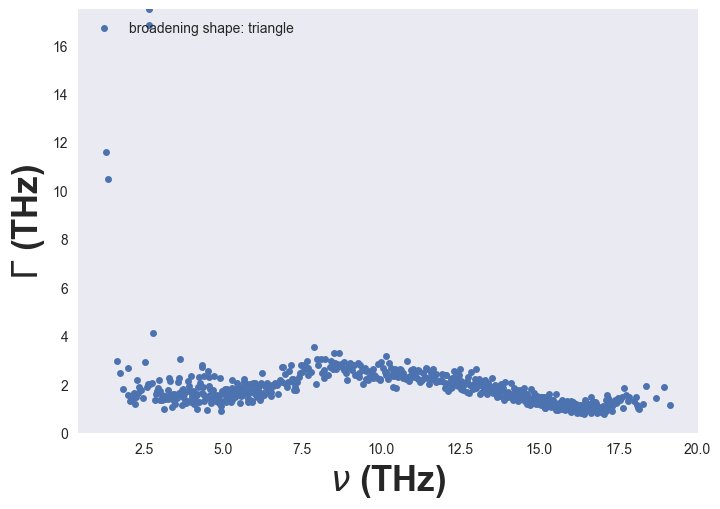

2025-10-16 10:09:22,681 - kaldo - INFO - Loading si-amorphous/300/quantum/tb_0.12088974854932301/phase_space




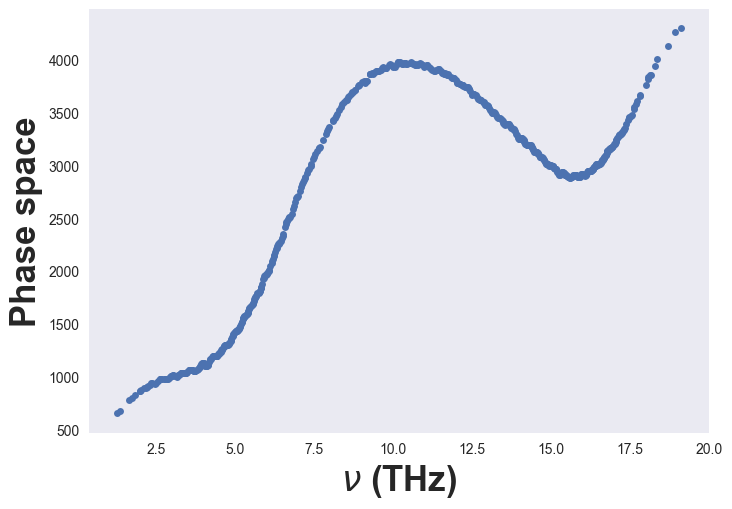

In [4]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

# Direct access to properties
# calculated during the simulation
frequency = phonons.frequency.flatten(order='C')
bandwidth = phonons.bandwidth.flatten(order='C')

# Plot phonon bandwidth vs frequency
print('\n')
plt.plot(frequency[3:],bandwidth[3:],'.',markersize=10,label= 'broadening shape: ' + str(phonons.broadening_shape))
plt.ylabel('$\Gamma$ (THz)', fontsize=25, fontweight='bold')
plt.xlabel("$\\nu$ (THz)", fontsize=25, fontweight='bold')
plt.ylim([bandwidth.min(), bandwidth.max()])
plt.legend(loc=2,frameon = False)
plt.grid()
plt.show()

phase_space = phonons.phase_space.flatten(order='C')

# Plot phase space vs frequency
print('\n')
plt.figure()
plt.plot(frequency[3:], phase_space[3:], '.', markersize=10)
plt.ylabel ("Phase space", fontsize=25, fontweight='bold')
plt.xlabel("$\\nu$ (THz)", fontsize=25, fontweight='bold')
plt.grid()
plt.show()

2025-10-16 12:40:20,007 - kaldo - INFO - Loading si-amorphous/qhgk/300/quantum/tb_0.12088974854932301/conductivity
2025-10-16 12:40:20,022 - kaldo - INFO - Loading si-amorphous/frequency
2025-10-16 12:40:20,030 - kaldo - INFO - Loading si-amorphous/qhgk/300/quantum/tb_0.12088974854932301/conductivity




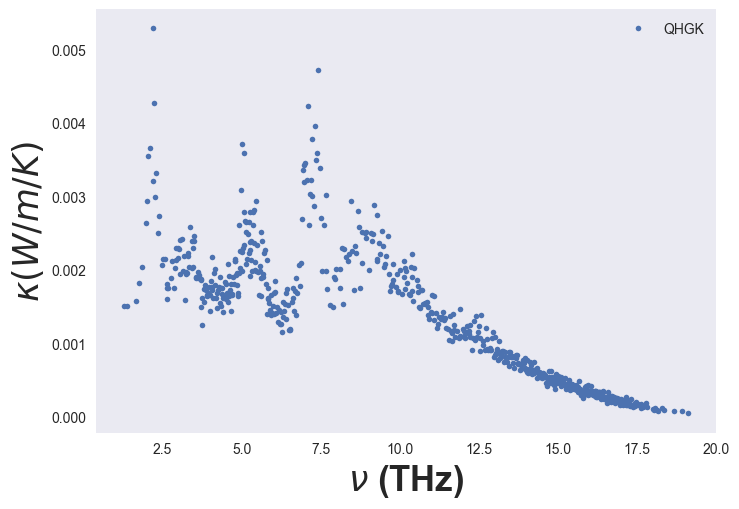

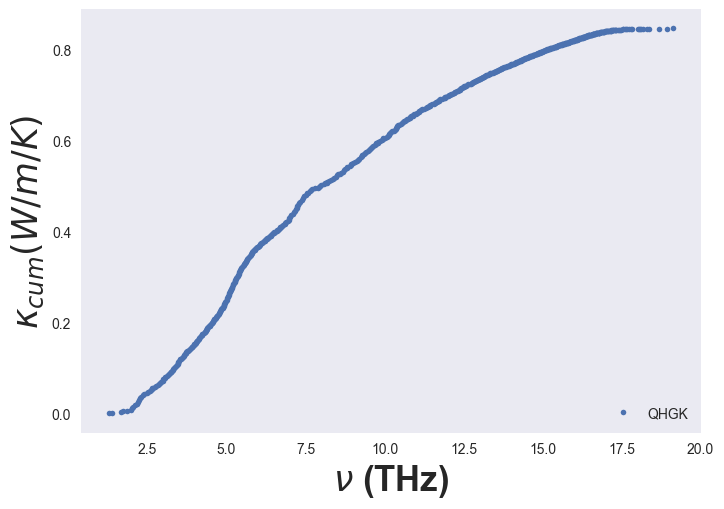

0.8469600774794039


In [6]:
from kaldo.conductivity import Conductivity
from kaldo.controllers import plotter
import numpy as np

# Compute conductivity with per phonon mode basis using qhgk method
kappa_qhgk_per_mode = np.einsum('maa->m',1/3*Conductivity(phonons=phonons, method='qhgk',n_iterations=20).conductivity)

# Compute cumulative conductivity by frequency with qhgk method
kappa_qhgk_cum_freq = plotter.cumulative_cond_cal(phonons.frequency,Conductivity(phonons=phonons, method='qhgk').conductivity,phonons.n_phonons)

print('\n')

# Visualize the per mode conductivity vs frequency
plt.figure()
plt.plot(frequency[3:],kappa_qhgk_per_mode[3:],'.',label='QHGK',ms=8)
plt.xlabel ("$\\nu$ (THz)", fontsize=25, fontweight='bold')
plt.ylabel(r'$\kappa(W/m/K)$', fontsize=25, fontweight='bold')
plt.legend(loc=1,frameon=False)
plt.grid()
plt.show()

print('\n')

# Visualize the cumulative conductivity vs frequency
plt.figure()
plt.plot(frequency[3:],kappa_qhgk_cum_freq[3:],'.',label='QHGK',ms=8)
plt.xlabel ("$\\nu$ (THz)", fontsize=25, fontweight='bold')
plt.ylabel(r'$\kappa_{cum}(W/m/K)$', fontsize=25, fontweight='bold')
plt.legend(loc=4,frameon=False)
plt.grid()
plt.show()

print(kappa_qhgk_cum_freq[-1])